In [1]:
# define relevants paths and load functions and libraries

%run Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\paper_code\\Analysis\\helper_functions\\functions_analysis.py
    
data_path = 'paper_code\\Datasets\\' # your data path
saving_path = 'paper_code\\Figures_output\\' # your saving figures path

In [2]:
data_path = 'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\paper_code\\Datasets\\' 
saving_path = 'C:\\Users\\bianchg\\Documents\\GitHub\\Bianchini2025_SC\\Figures_output\\'

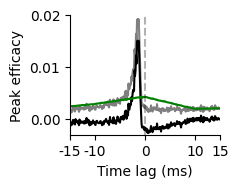

In [5]:
# Plot examples CCG - Fig 5A

# Load the .mat file
load_dir = ''.join([data_path,'connectivity_dataset\\example_CCG_recording11.mat'])
data = mat73.loadmat(load_dir)

# Extract variables from the loaded data
ccg_output = data['ccg_output']

# choose neuron
i = 1717
peaks = np.max(ccg_output['ccg_control'][i, :], axis=0)
lpeak_lag = np.argmax(ccg_output['ccg_control'][i, :], axis=0)
lag_val = 150

peak_lag = lag_val - lpeak_lag + 1
peak_lag = peak_lag * -1

fig, this_ax = plt.subplots(1,1, figsize=(1.5,1.2)) # this is half of an A4 page
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

this_ax.spines['top'].set_visible(False)
this_ax.spines['right'].set_visible(False)

this_ax.plot(ccg_output['ccg_norm'][i, :], 'k', label='Norm',alpha = 0.5)
this_ax.plot(ccg_output['ccg_control'][i, :], 'k', label='Control')
this_ax.plot(ccg_output['ccg_norm_jitter'][i, :], 'g', label='Norm Jitter')
#this_ax.set_title(f"Index: {i}, Peak Lag: {peak_lag}")
this_ax.axvline(x=150, color='k', linestyle='--',alpha = 0.3)
this_ax.set_ylim([-0.003,0.02])
this_ax.set_yticks([0,0.01,0.02])
this_ax.set_xticks([0,50,150,250,300])
this_ax.set_xticklabels([-15,-10,0,10,15])
this_ax.set_xlim([0,300])
this_ax.set_xlabel('Time lag (ms)')
this_ax.set_ylabel('Peak efficacy')

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure5A.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


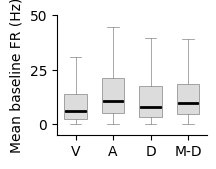

In [3]:
# Compare mean FR during baseline for the same neurons - Fig 5B

load_dir = ''.join([data_path,'connectivity_dataset\\FR_subgroups.npz'])
data = np.load(load_dir)

all_labels = data['all_labels']
all_data = data['all_data']
medians = data['medians']

fig,axs = plt.subplots(1,1,figsize=(1.5,1.2))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
n_modalities = 4
    
sns.boxplot(x=all_labels, y=all_data, ax=axs, color='gainsboro', linewidth=0.5, showfliers=False,width=0.6)

# Overlay the median lines
for i, median in enumerate(medians, start=0):
    axs.plot([i - 0.25, i + 0.25], [median, median], color='black', linewidth=2, zorder=3)

axs.set_xticks(range(n_modalities))
axs.set_xticklabels(['V','A','D','M-D'],fontsize = 10)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_ylim([-5, 50])
axs.set_yticks([0,25,50],fontsize = 10)
axs.set_ylabel('Mean baseline FR (Hz)',fontsize = 10)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure5B.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


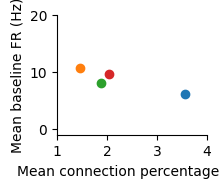

In [15]:
# mean connection percentage and mean baseline FR for different functional subpopulations - Fig 5C

fig,axs = plt.subplots(1,1,figsize=(1.5,1.2))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

colors = ['#4D98CE', '#EE8222','Green' ,'#AF4E9D']

perc_conn =data['perc_conn']

for c in range(perc_conn.shape[0]):
    axs.scatter(perc_conn[c],medians[c],cmap = colors[c])

axs.set_xlim([1,4])
axs.set_xlabel('Mean connection percentage (%)',fontsize = 10)
axs.set_ylabel('Mean baseline FR (Hz)',fontsize = 10)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_ylim([-1, 20])
axs.set_yticks([0,10,20],fontsize = 10)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure5C.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


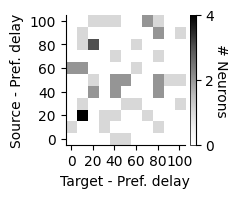

In [19]:
#which delay prefering neurons are connected to which? - Fig 5D

load_dir = ''.join([data_path,'connectivity_dataset\\preferred_delay_connectivity.npz'])
data = np.load(load_dir)

all_pre = data['all_pre']
all_post = data['all_post']

dims = (1, 1)
fig, this_ax = plt.subplots(*dims, figsize=(1.3,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

concatenated_array = np.concatenate(all_pre, axis=0)
y = np.array(concatenated_array).ravel()

concatenated_array = np.concatenate(all_post, axis=0)
x = np.array(concatenated_array).ravel()

cm = confusion_matrix(y, x)
im = this_ax.imshow(cm.transpose(),aspect="auto",cmap='Greys')
this_ax.invert_yaxis()
n_delays = 11
this_ax.spines["right"].set_visible(False)
this_ax.spines['top'].set_visible(False)
this_ax.set_xlabel('Observed Pref. AV delay', fontsize = 10)
this_ax.set_ylabel('Predicted Pref. AV delay', fontsize = 10)
this_ax.set_xticks(np.arange(0,n_delays,2),np.arange(0,n_delays,2)*10, fontsize = 10)
this_ax.set_yticks(np.arange(0,n_delays,2),np.arange(0,n_delays,2)*10, fontsize = 10)
this_ax.set_xlabel('Target - Pref. delay',fontsize=10)
this_ax.set_ylabel('Source - Pref. delay',fontsize=10)

val_min = 0
val_max = np.round(np.nanmax(cm)).astype(int)
divider = make_axes_locatable(this_ax)
norm = LogNorm(vmin=val_min, vmax=val_max)

cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im,cax=cax ,ticks=[val_min,val_max/2, val_max],  format='%d', norm=norm)
cbar.ax.set_yticklabels(['{}'.format(val_min), '{:.0f}'.format(val_max/2), '{}'.format(val_max)])
cbar.set_label('# Neurons',rotation=-90,labelpad=10,fontsize=10)
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)
cbar.outline.set_linewidth(0.5)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure5D.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


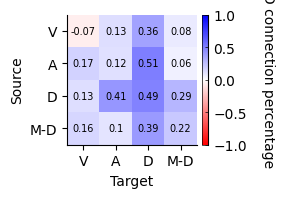

In [17]:
# difference in connection percentage between medial and lateral SC - Fig 5E

load_dir = ''.join([data_path,'connectivity_dataset\\connectivity_matrix_MminumsL.npy'])
perc_conn = np.load(load_dir)

fig, axs = plt.subplots(1,1,figsize=(1.5,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5) 
print_real_n = 0
b = 0 
ax = axs
ax.set_xticks(np.arange(int(n_modalities)))
ax.set_xticklabels(['V','A','D','M-D'],fontsize = 10)

ax.set_yticks(np.arange(int(n_modalities)))
ax.set_yticklabels(['V','A','D','M-D'],fontsize = 10)

ax.set_xlabel('Target',fontsize=10)
ax.set_ylabel('Source',fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
these_data = (perc_conn[0,:,:]- perc_conn[1,:,:])/(perc_conn[0,:,:]+perc_conn[1,:,:])
val_max = 1
val_min = -1
img = ax.imshow(these_data, cmap='bwr_r', interpolation='nearest',vmin=val_min,vmax= val_max)
           
curr_scores = np.round(these_data[:,:,0],2)
for i in range(curr_scores.shape[0]):
    for j in range(curr_scores.shape[1]):
        if not np.isnan(curr_scores[i, j]):
            ax.text(j, i, f'{curr_scores[i, j]}', ha='center', va='center', fontsize=7)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(img,cax=cax)
cbar.set_label('D connection percentage',rotation=-90,labelpad=20,fontsize=10)
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)
cbar.ax.tick_params(width=0.5, length=2, direction='in', which='both',labelsize=10)
cbar.outline.set_linewidth(0.5)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure5E.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


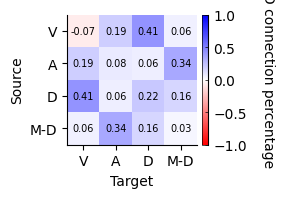

In [5]:

# difference in connection percentage between medial and lateral SC - Fig 5E

load_dir = ''.join([data_path,'connectivity_dataset\\connectivity_matrix_MminumsL_zeroCCG.npy'])
perc_conn = np.load(load_dir)

fig, axs = plt.subplots(1,1,figsize=(1.5,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5) 
print_real_n = 0
b = 0 
ax = axs
ax.set_xticks(np.arange(int(n_modalities)))
ax.set_xticklabels(['V','A','D','M-D'],fontsize = 10)

ax.set_yticks(np.arange(int(n_modalities)))
ax.set_yticklabels(['V','A','D','M-D'],fontsize = 10)

ax.set_xlabel('Target',fontsize=10)
ax.set_ylabel('Source',fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
these_data = (perc_conn[0,:,:]- perc_conn[1,:,:])/(perc_conn[0,:,:]+perc_conn[1,:,:])
val_max = 1
val_min = -1
img = ax.imshow(these_data, cmap='bwr_r', interpolation='nearest',vmin=val_min,vmax= val_max)
           
curr_scores = np.round(these_data[:,:,0],2)
for i in range(curr_scores.shape[0]):
    for j in range(curr_scores.shape[1]):
        if not np.isnan(curr_scores[i, j]):
            ax.text(j, i, f'{curr_scores[i, j]}', ha='center', va='center', fontsize=7)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(img,cax=cax)
cbar.set_label('D connection percentage',rotation=-90,labelpad=20,fontsize=10)
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)
cbar.ax.tick_params(width=0.5, length=2, direction='in', which='both',labelsize=10)
cbar.outline.set_linewidth(0.5)